In [86]:
import random 
import numpy as np
import matplotlib.pyplot as plt 
from cs231n.data_utils import load_CIFAR10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
def get_CIFAR10_data(num_training = 49000, num_validation=1000, num_test=1000, num_dev = 500):
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    try:
        del X_train, y_train
        del X_test, y_test
        print('Clear previously loaded data.')
    except:
        pass
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev

X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train label shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation label shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test label shape: ', y_test.shape)
print('Dev data shape: ', X_dev.shape)
print('Dev label shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train label shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation label shape:  (1000,)
Test data shape:  (1000, 3073)
Test label shape:  (1000,)
Dev data shape:  (500, 3073)
Dev label shape:  (500,)


In [71]:
from cs231n.classifiers import softmax_loss_naive
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)
print('loss: %f' % loss)
print ('sanity check: %f' % (-np.log(0.1)))
# 合理性检查

loss: 2.335708
sanity check: 2.302585


In [72]:
from cs231n.gradient_check import grad_check_sparse
loss ,grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.244878 analytic: 0.244878, relative error: 9.683793e-08
numerical: 1.286597 analytic: 1.286597, relative error: 4.890958e-08
numerical: 3.116722 analytic: 3.116721, relative error: 2.379559e-08
numerical: -2.509169 analytic: -2.509169, relative error: 7.589857e-10
numerical: 0.388441 analytic: 0.388441, relative error: 8.509763e-08
numerical: -0.645305 analytic: -0.645305, relative error: 8.794489e-10
numerical: 0.627387 analytic: 0.627387, relative error: 1.387394e-07
numerical: -1.029072 analytic: -1.029072, relative error: 4.712020e-10
numerical: 1.092908 analytic: 1.092908, relative error: 6.156084e-08
numerical: 0.082393 analytic: 0.082393, relative error: 3.198135e-07
numerical: -1.766162 analytic: -1.766162, relative error: 3.007407e-08
numerical: 1.528995 analytic: 1.528995, relative error: 6.346494e-08
numerical: 1.079133 analytic: 1.079133, relative error: 3.248699e-08
numerical: -2.447461 analytic: -2.447461, relative error: 2.536264e-08
numerical: -0.728659 ana

In [80]:
import time
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 5e-6)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))
from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 5e-6)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Gradient difference: %f' % grad_difference)

naive loss: 2.335708e+00 computed in 0.148388s
vectorized loss: 2.335708e+00 computed in 0.002958s
Gradient difference: 0.000000


In [97]:
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None

# learning_rates = [1e-7, 5e-7]
# regularization_strengths = [2.5e4, 5e4]
learning_rates = [1e-7, 2e-7, 5e-7]
regularization_strengths =[(1+0.1*i)*1e4 for i in range(-3,4)] + [(5+0.1*i)*1e4 for i in range(-3,4)]

for lr in learning_rates:
    for reg in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train,learning_rate=lr, reg=reg, num_iters=1500, verbose=True)
        
        y_train_pred = softmax.predict(X_train)
        train_accuracy = np.mean(y_train_pred == y_train)
    
        y_val_pred = softmax.predict(X_val)
        val_accuracy = np.mean(y_val_pred == y_val)
        
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_softmax = softmax
        results[(lr, reg)] = train_accuracy, val_accuracy
    
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))

print('Best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 221.590971
iteration 100 / 1500: loss 166.579164
iteration 200 / 1500: loss 125.917423
iteration 300 / 1500: loss 95.552992
iteration 400 / 1500: loss 72.523486
iteration 500 / 1500: loss 55.160857
iteration 600 / 1500: loss 42.132594
iteration 700 / 1500: loss 32.197987
iteration 800 / 1500: loss 24.750775
iteration 900 / 1500: loss 19.039807
iteration 1000 / 1500: loss 15.017141
iteration 1100 / 1500: loss 11.740568
iteration 1200 / 1500: loss 9.362615
iteration 1300 / 1500: loss 7.625340
iteration 1400 / 1500: loss 6.255079
iteration 0 / 1500: loss 252.522286
iteration 100 / 1500: loss 182.747588
iteration 200 / 1500: loss 132.694854
iteration 300 / 1500: loss 96.468448
iteration 400 / 1500: loss 70.535229
iteration 500 / 1500: loss 51.674229
iteration 600 / 1500: loss 37.908520
iteration 700 / 1500: loss 27.960696
iteration 800 / 1500: loss 20.831766
iteration 900 / 1500: loss 15.717712
iteration 1000 / 1500: loss 11.953812
iteration 1100 / 1500: loss 9.222

In [98]:
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % test_accuracy)

softmax on raw pixels final test set accuracy: 0.368000


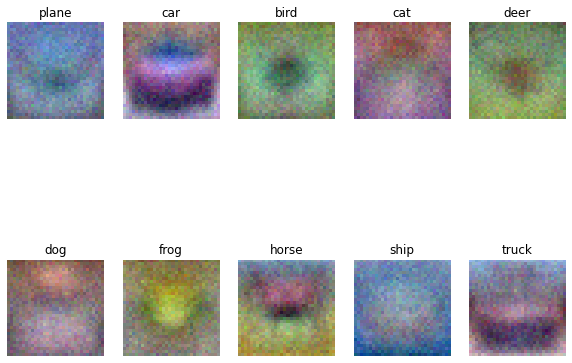

In [99]:
w = best_softmax.W[:-1,:]
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i+1)
    
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])